# Applied AI in Biomedicine project

The following code is our implementation for the project of the course "Applied AI in Biomedicine". The task performed is the classification of single heartbeats extracted from ECG signals given as dataset.
The full description of our work is presented in our report.

Project members:


*   Giovanni Dispoto
*   Francesco Romanò



# Data Loading

In this section we simply load the complete dataset composed of 105 raw ECG signals recorded from different patients

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install tdqm

     |████████████████████████████████| 1.1 MB 8.0 MB/s 
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1319 sha256=028bdd077e035101300db7b6b24c5afddb640c0e2a37ce2ede821b0c108ee9bf
  Stored in directory: /root/.cache/pip/wheels/c6/f0/d9/9fa5ff78c0f9d5a0a427bbbb4893c283520ddfccb885ea2205
Successfully built tdqm


In [ ]:
!unzip /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip -d /content/training_set

Archive:  /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip
  inflating: /content/training_set/S001_128.mat  
  inflating: /content/training_set/S001_128_ann.mat  
  inflating: /content/training_set/S001_128_rpk.mat  
  inflating: /content/training_set/S002_128.mat  
  inflating: /content/training_set/S002_128_ann.mat  
 extracting: /content/training_set/S002_128_rpk.mat  
  inflating: /content/training_set/S003_128.mat  
  inflating: /content/training_set/S003_128_ann.mat  
  inflating: /content/training_set/S003_128_rpk.mat  
  inflating: /content/training_set/S004_128.mat  
  inflating: /content/training_set/S004_128_ann.mat  
 extracting: /content/training_set/S004_128_rpk.mat  
  inflating: /content/training_set/S005_128.mat  
  inflating: /content/training_set/S005_128_ann.mat  
  inflating: /content/training_set/S005_128_rpk.mat  
  inflating: /content/training_set/S006_128.mat  
  inflating: /content/training_set/S006_128_ann.mat  
  inflating: /co

In [ ]:
input_dir = "/content/training_set"

In [ ]:
import os

# list the data present in the dataset
dirs = sorted(os.listdir(input_dir))
print(dirs)

['S001_128.mat', 'S001_128_ann.mat', 'S001_128_rpk.mat', 'S002_128.mat', 'S002_128_ann.mat', 'S002_128_rpk.mat', 'S003_128.mat', 'S003_128_ann.mat', 'S003_128_rpk.mat', 'S004_128.mat', 'S004_128_ann.mat', 'S004_128_rpk.mat', 'S005_128.mat', 'S005_128_ann.mat', 'S005_128_rpk.mat', 'S006_128.mat', 'S006_128_ann.mat', 'S006_128_rpk.mat', 'S007_128.mat', 'S007_128_ann.mat', 'S007_128_rpk.mat', 'S008_128.mat', 'S008_128_ann.mat', 'S008_128_rpk.mat', 'S009_128.mat', 'S009_128_ann.mat', 'S009_128_rpk.mat', 'S010_128.mat', 'S010_128_ann.mat', 'S010_128_rpk.mat', 'S011_128.mat', 'S011_128_ann.mat', 'S011_128_rpk.mat', 'S012_128.mat', 'S012_128_ann.mat', 'S012_128_rpk.mat', 'S013_128.mat', 'S013_128_ann.mat', 'S013_128_rpk.mat', 'S014_128.mat', 'S014_128_ann.mat', 'S014_128_rpk.mat', 'S015_128.mat', 'S015_128_ann.mat', 'S015_128_rpk.mat', 'S016_128.mat', 'S016_128_ann.mat', 'S016_128_rpk.mat', 'S017_128.mat', 'S017_128_ann.mat', 'S017_128_rpk.mat', 'S018_128.mat', 'S018_128_ann.mat', 'S018_128_r

In [ ]:
# environment setup
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import pandas as pd
import random
import tensorflow as tf
import sklearn
from collections import Counter
import scipy


#Setting random seed for reproducibility
#Remember to use always SEED for the functions that requires it (like Scikit models)
SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [ ]:
# Utility function to load data

def load_data(ecg_file):
  ecg = loadmat(ecg_file)
  rpk_file = ecg_file.replace('.mat', '_rpk.mat')
  rpk = loadmat(rpk_file)
  ann_file = ecg_file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)
  return ecg, rpk, ann

In [ ]:
# Load 64/105 ECG signals as training set 
train = ['S043_128.mat', 'S059_128.mat', 'S117_250.mat', 'S042_128.mat',
       'S004_128.mat', 'S039_128.mat', 'S050_128.mat', 'S002_128.mat',
       'S097_250.mat', 'S003_128.mat', 'S006_128.mat', 'S047_128.mat',
       'S041_128.mat', 'S083_250.mat', 'S007_128.mat', 'S056_128.mat',
       'S102_250.mat', 'S093_250.mat', 'S022_128.mat', 'S008_128.mat',
       'S116_250.mat', 'S035_128.mat', 'S115_250.mat', 'S001_128.mat',
       'S060_128.mat', 'S026_128.mat', 'S030_128.mat', 'S063_128.mat',
       'S045_128.mat', 'S044_128.mat', 'S009_128.mat', 'S027_128.mat',
       'S061_128.mat', 'S028_128.mat', 'S079_250.mat', 'S107_250.mat',
       'S058_128.mat', 'S092_250.mat', 'S112_250.mat', 'S104_250.mat',
       'S017_128.mat', 'S082_250.mat', 'S016_128.mat', 'S064_128.mat',
       'S114_250.mat', 'S062_128.mat', 'S051_128.mat', 'S005_128.mat',
       'S108_250.mat', 'S020_128.mat', 'S054_128.mat', 'S057_128.mat',
       'S065_128.mat', 'S118_250.mat', 'S010_128.mat', 'S033_128.mat',
       'S048_128.mat', 'S032_128.mat', 'S046_128.mat', 'S034_128.mat',
       'S015_128.mat', 'S013_128.mat', 'S111_250.mat', 'S103_250.mat']   

In [ ]:
# Load 16/105 ECG signals as validation set
validation =['S014_128.mat', 'S029_128.mat', 'S023_128.mat', 'S098_250.mat',
       'S019_128.mat', 'S094_250.mat', 'S018_128.mat', 'S055_128.mat',
       'S021_128.mat', 'S031_128.mat', 'S096_250.mat', 'S025_128.mat',
       'S053_128.mat', 'S101_250.mat', 'S036_128.mat', 'S011_128.mat']

In [ ]:
# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
# training set is loaded here
filenames_train = list()
ecgs_train = list()
rpks_train = list()
anns_train = list()

for i in range(len(train)):
  ecg, rpk, ann = load_data(input_dir+'/'+train[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, len(train)),
        end=""
    )
  ecgs_train.append(ecg)
  rpks_train.append(rpk)
  anns_train.append(ann)
  filenames_train.append(input_dir+'/'+train[i])


Loading file: 64/64

In [ ]:
# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
# validation set is loaded here
filenames_validation = list()
ecgs_validation = list()
rpks_validation = list()
anns_validation = list()

for i in range(len(validation)):
  ecg, rpk, ann = load_data(input_dir+'/'+validation[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, len(validation)),
        end=""
    )
  ecgs_validation.append(ecg)
  rpks_validation.append(rpk)
  anns_validation.append(ann)
  filenames_validation.append(input_dir+'/'+validation[i])

Loading file: 16/16

# Preprocessing

In this section we implement our data pre-processing

(-1.0, 3.0)

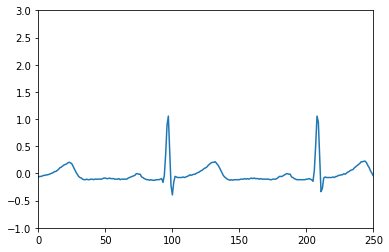

In [ ]:
# plot a piece of one ECG signal
plt.plot(ecgs_train[1]['ecg'][:,0])
plt.xlim(0,250)
plt.ylim(-1,3)

In [ ]:
# Utility: given the filename of a signal it returns the sampling frequency
def ecg_freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

Resampling all the signal to 250 hz

In [ ]:
# Resample to 250 Hz training ECG signals

resampled_ecg_1_train = []
resampled_ecg_2_train = []
for i in range(len(ecgs_train)):
   secs_1 = len(ecgs_train[i]['ecg'][:,0])/ecg_freq(filenames_train[i]) # Number of seconds in signal X
   secs_2 = len(ecgs_train[i]['ecg'][:,1])/ecg_freq(filenames_train[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   samps_2 = secs_2*250
   resampled_ecg_1_train.append(scipy.signal.resample(ecgs_train[i]['ecg'][:,0] , int(samps_1))) 
   resampled_ecg_2_train.append(scipy.signal.resample(ecgs_train[i]['ecg'][:,1] , int(samps_2))) 

In [ ]:
# Resample to 250 Hz validation ECG signals

resampled_ecg_1_validation = []
resampled_ecg_2_validation = []
for i in range(len(ecgs_validation)):
   secs_1 = len(ecgs_validation[i]['ecg'][:,0])/ecg_freq(filenames_validation[i]) # Number of seconds in signal X
   secs_2 = len(ecgs_validation[i]['ecg'][:,1])/ecg_freq(filenames_validation[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   samps_2 = secs_2*250
   resampled_ecg_1_validation.append(scipy.signal.resample(ecgs_validation[i]['ecg'][:,0] , int(samps_1))) 
   resampled_ecg_2_validation.append(scipy.signal.resample(ecgs_validation[i]['ecg'][:,1] , int(samps_2))) 

128

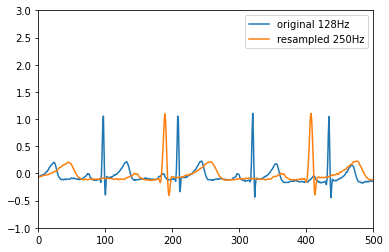

In [ ]:
# look the effect of signal resampling
beat = 1
plt.plot(ecgs_train[beat]['ecg'][:,0])
plt.plot(resampled_ecg_1_train[beat])
plt.legend(['original 128Hz', 'resampled 250Hz'])
plt.xlim(0, 500)
plt.ylim(-1,3)

ecg_freq(filenames_train[beat])

Now we apply medfilt and FIR filters in order to remove low- and high-frequency noises to the signal

In [ ]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = scipy.signal.firwin(12, 35/125, fs = 250)


In [ ]:
mf600 = int(250 * 0.6) - 1
mf200 = int(250 * 0.2) - 1
for i in range(len(resampled_ecg_1_train)):
  resampled_ecg_1_train[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_train[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_train[i], mf200), mf600))
  resampled_ecg_2_train[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_train[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_train[i], mf200), mf600))


for i in range(len(resampled_ecg_1_validation)):
  resampled_ecg_1_validation[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_validation[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_validation[i], mf200), mf600))
  resampled_ecg_2_validation[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_validation[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_validation[i], mf200), mf600))


250

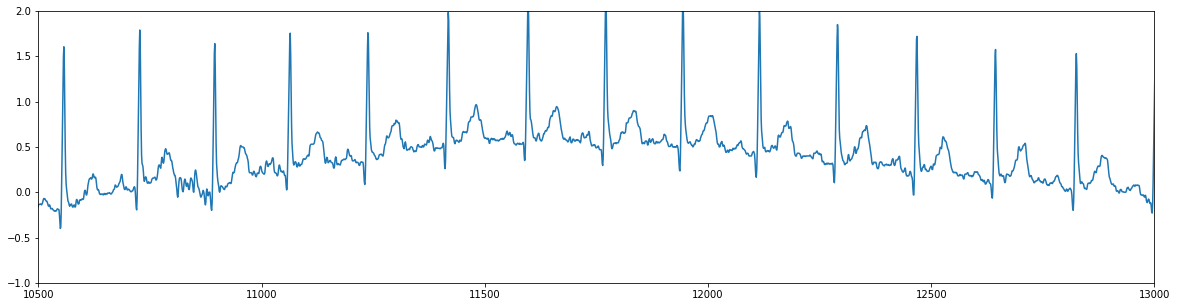

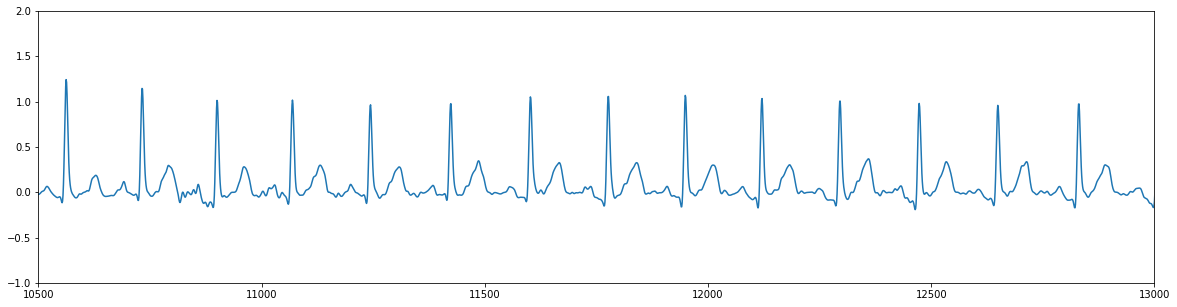

In [ ]:
# plot the effect of the denoising procedure showing a piece of ECG before and after the applications of filters

x = 37
plt.figure(figsize=(20, 5))
plt.plot(ecgs_train[x]['ecg'][:,0])
plt.xlim(10500, 13000)
plt.ylim(-1,2)
plt.figure(figsize=(20, 5))
plt.plot(resampled_ecg_1_train[x])
plt.xlim(10500, 13000)
plt.ylim(-1,2)
ecg_freq(filenames_train[x])

In [ ]:
rpks_train[0]['rpeaks']

array([[     5],
       [    98],
       [   191],
       ...,
       [230129],
       [230229],
       [230329]], dtype=int32)

In [ ]:
def from_freq_to_freq(sample, ini_freq, freq = 250):
   secs = sample/ini_freq # Number of seconds in signal X
   samp = secs*freq       # Number of samples to downsample
   return int(samp)

In [ ]:
# This parameter is the number of samples considered to segment the ECG signal (the segment will be the samples of current R peak +/- win)

win = 250

In [ ]:
# Extract all the segments (single heartbeats) from the original raw signals

heartbeats_train_1 = []
heartbeats_train_2 = []
heartbeats_validation_1 = []
heartbeats_validation_2 = []

for i in range(len(ecgs_train)): 
  for j in range(len(rpks_train[i]['rpeaks'])):
   if(from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i])) < win or from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  + win > from_freq_to_freq(rpks_train[i]['rpeaks'][-1],ecg_freq(filenames_train[i])) or j < 40 or (len(rpks_train[i]['rpeaks']) - (j+1) < 40)): #skipping beats that are too much close to the initial and to the end of the signal 
    anns_train[i]['labels'][j] = 'A'
    rpks_train[i]['rpeaks'][j] = 0
   else: 
    heartbeats_train_1.append(resampled_ecg_1_train[i][from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  - win : from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  + win])
    heartbeats_train_2.append(resampled_ecg_2_train[i][from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  - win : from_freq_to_freq(rpks_train[i]['rpeaks'][j],ecg_freq(filenames_train[i]))  + win])

for i in range(len(ecgs_validation)):
  for j in range(len(rpks_validation[i]['rpeaks'])):
   if(from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i])) < win or from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i])) + win > from_freq_to_freq(rpks_validation[i]['rpeaks'][-1],ecg_freq(filenames_validation[i]))): #skipping beats that are too much close to the initial and to the end of the signal 
    anns_validation[i]['labels'][j] = 'A'
    rpks_validation[i]['rpeaks'][j] = 0
   else: 
    heartbeats_validation_1.append(resampled_ecg_1_validation[i][from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  - win : from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  + win])
    heartbeats_validation_2.append(resampled_ecg_2_validation[i][from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  - win : from_freq_to_freq(rpks_validation[i]['rpeaks'][j],ecg_freq(filenames_validation[i]))  + win])    

In [ ]:
len(rpks_train[0]['rpeaks']), len(np.delete(rpks_train[0]['rpeaks'], 0))

(2313, 2312)

In [ ]:
len(heartbeats_train_1), len(heartbeats_train_2), len(heartbeats_validation_1), len(heartbeats_validation_2)

(157724, 157724, 47076, 47076)

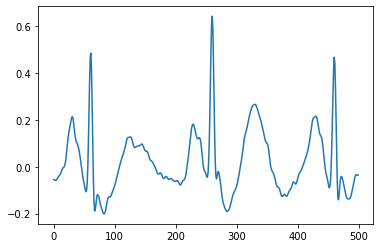

In [ ]:
# plot an example of segment
plt.plot(heartbeats_train_1[150])

It follows the data preparation to be fed into our Neural Network

In [ ]:
labels_train = []
labels_validation = []

for i in range(len(ecgs_train)):
  for j in range(len(anns_train[i]['labels'])):
    if(anns_train[i]['labels'][j] != 'A'):
     labels_train.append(anns_train[i]['labels'][j])

for i in range(len(ecgs_validation)):
  for j in range(len(anns_validation[i]['labels'])):
    if(anns_validation[i]['labels'][j] != 'A'):
     labels_validation.append(anns_validation[i]['labels'][j])   

In [ ]:
classes_name = ['N', 'S', 'V']

In [ ]:
len(labels_train), len(heartbeats_train_1)

(157724, 157724)

In [ ]:
len(labels_validation), len(heartbeats_validation_1)

(47076, 47076)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_train)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_train = ohe.fit_transform(integer_encoded)

integer_encoded = label_encoder.fit_transform(labels_validation)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_validation = ohe.fit_transform(integer_encoded)

In [ ]:
label_encoder.inverse_transform([0,1,2])

array(['N', 'S', 'V'], dtype='<U1')

In [ ]:
ohe.inverse_transform([[1, 0, 0], [0,1,0], [0,0,1]])

array([[0],
       [1],
       [2]])

In [ ]:
y_train = target_ohe_train
y_val = target_ohe_validation

In [ ]:
X_train_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_train_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_train_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_train_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_val_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_validation_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_val_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_validation_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")

In [ ]:
y_train.shape

(157724, 3)

In [ ]:
X_train_1.shape, X_train_2.shape

((157724, 500), (157724, 500))

In [ ]:
X_train = []
for i in range(len(X_train_1)):
  X_train.append([X_train_1[i], X_train_2[i]])

X_train = np.asarray(X_train)

In [ ]:
X_val = []
for i in range(len(X_val_1)):
  X_val.append([X_val_1[i], X_val_2[i]])

X_val = np.asarray(X_val)

(157724, 2, 500)

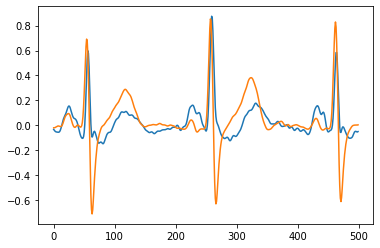

In [ ]:
plt.plot(X_train[900][0])
plt.plot(X_train[900][1])
X_train.shape

It is possible to train the model using only one of the leads or both. Run only one of the two options.

## 2 leads normalization

Run these cells if you want both leads

In [ ]:
# Normalize data
mean = np.mean(X_train, axis=2).mean(axis=0)
std = np.std(X_train, axis=2).mean(axis=0)

X_train[:,0] = (X_train[:,0] - mean[0])/std[0]
X_train[:,1] = (X_train[:,1] - mean[1])/std[1]
X_val[:,0] = (X_val[:,0] - mean[0])/std[0]
X_val[:,1] = (X_val[:,1] - mean[1])/std[1]

mean, std, X_train.shape

(array([ 0.04431525, -0.00065308], dtype=float32),
 array([0.27972424, 0.21831763], dtype=float32),
 (157724, 2, 500))

In [ ]:
X_train = np.swapaxes(X_train, 1, 2)
X_val = np.swapaxes(X_val, 1, 2)
X_train.shape, X_val.shape

((157724, 500, 2), (47076, 500, 2))

(157724, 500, 2)

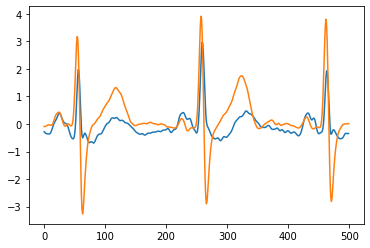

In [ ]:
plt.plot(X_train[900][:])
X_train.shape

In [ ]:
#Prepare for SMOTE
X_train = X_train.reshape(145732, -1)
X_train.shape

(157724, 1000)

## Only lead 1 normalization

Run these cells if you want lead1 only

In [ ]:
X_train = np.asarray(X_train_1)
X_val = np.asarray(X_val_1)

In [ ]:
# Normalize data (used for resnet, not for vgg)
mean = np.mean(X_train, axis=1).mean(axis=0)
std = np.std(X_train, axis=1).mean(axis=0)

X_train = (X_train - mean)/std
X_val = (X_val - mean)/std

mean, std

(0.04416695, 0.27895087)

In [ ]:
len(X_train), len(X_train > 3)

(145732, 145732)

'N'

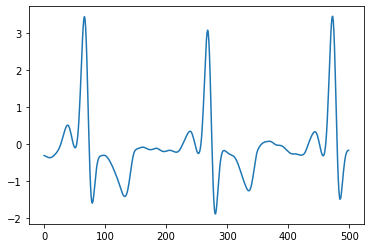

In [ ]:
beat = 10000
plt.plot(X_train[beat])
labels_train[beat]

# Resampling

In this section we perform resampling techniques to balance our training data

In [ ]:
y_l = y_train.tolist()
len([i for i in y_l if i == [1,0,0]]), len([i for i in y_l if i == [0,1,0]]), len([i for i in y_l if i == [0,0,1]])

(145722, 6491, 5511)

The SMOTE algorithm is used to generate new samples of S and V classes and reach ~30k samples for each class.

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

smote_dict = {1: 40000, 2: 40000}

# Oversampling performed by SMOTE
#X_train, y_train = SMOTE(random_state=SEED, sampling_strategy= smote_dict ).fit_resample(X_train, y_train)
X_train, y_train = SMOTE(random_state=SEED, sampling_strategy={0: 133730, 1: int(6491 * 5), 2: int(5511 * 6)} ).fit_resample(X_train, y_train) # used on BEST

In [ ]:
y_l = y_train.tolist()
len([i for i in y_l if i == [1,0,0]]), len([i for i in y_l if i == [0,1,0]]), len([i for i in y_l if i == [0,0,1]])

(145722, 38946, 38577)

In [ ]:
near_miss_dict = {0: 40000}

# Undersampling performed by NearMiss algorithm
#X_train, y_train = NearMiss(sampling_strategy=near_miss_dict).fit_resample(X_train, y_train)
X_train, y_train = RandomUnderSampler(random_state=SEED,sampling_strategy={0: int(133730*0.5), 1: int(6491 * 5), 2: int(5511 * 6)}).fit_resample(X_train, y_train) # used on BEST
#X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [ ]:
y_l = y_train.tolist()
len([i for i in y_l if i == [1,0,0]]), len([i for i in y_l if i == [0,1,0]]), len([i for i in y_l if i == [0,0,1]])

(72861, 38946, 38577)

Run this cell only if 2-leads is used

In [ ]:
# if 2 leads where used we remap it to the correct shape
X_train = X_train.reshape(-1, win*2, 2)

X_train.shape

(150384, 500, 2)

# Class weights

In this section we compute class weights. The class weights over the training set are not used in our final version, and they could be an alternative to resampling.
The class weights over the validation set are instead used to monitor a weighted loss function during the training, as explained in the report 

In [ ]:
import sklearn
X_train, y_train = sklearn.utils.shuffle(X_train, y_train)

In [ ]:
# Considering class imbalance: class weightning to reduce the bias in the dataset

from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(
                                      class_weight = "balanced",
                                      classes = np.unique(y_integers),
                                      y = y_integers                                             
                                    )

class_weights = dict(zip(np.unique(y_integers), class_weights))
class_weights

{0: 0.6599665993668835, 1: 1.3596877728136394, 2: 1.334563196838646}

In [ ]:
X_train.shape, y_train.shape

((132386, 500, 2), (132386, 3))

In [ ]:
#class weights for validation set
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_val, axis=1)

class_weights_val = compute_class_weight(
                                      class_weight = "balanced",
                                      classes = np.unique(y_integers),
                                      y = y_integers                                             
                                    )

In [ ]:
class_weights_val

array([ 0.35474974,  9.29620853, 13.59792028])

In [ ]:
decode = dict(N =  0, S = 1, V  = 2)

In [ ]:
samples_class_weights = []
for y in y_val:
  samples_class_weights.append(class_weights_val[ohe.inverse_transform([y])[0][0]])

# Training utilities

In [ ]:
# Here we load validation data, training data can be loaded with the batch generator below

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_data = tf.data.Dataset.from_tensor_slices((X_val, y_val, samples_class_weights))

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix

#utility to plot confusion matrix and evaluation metrics
def evaluate_on_valid(model, batch_size, valid_to_use):
  #Computing the prediction of the model on the validation set
  predictions = []
  for element in valid_to_use.batch(batch_size).as_numpy_iterator():
      predictions.append(model.predict(element[0]))
  
  predictions_f = [item for sublist in predictions for item in sublist]

  predictions_oh = []
  #transform prediction into one-hot-encoding 
  for i in range(len(predictions_f)):
      predictions_oh.append(tf.one_hot(tf.argmax(predictions_f[i]), depth=3))
  
  #Compute the true and prediction array in order to plot the confusion matrix
  y = []

  for y_t in y_val.tolist():
      if(y_t == [1, 0, 0]):
          y.append('N')
      if(y_t == [0, 1 ,0]):
          y.append('S')
      if(y_t == [0, 0 ,1]):
          y.append('V')    

  y_pred = []

  for y_t in predictions_oh:
      if(all(tf.equal(y_t, tf.constant([1, 0, 0], dtype=np.float32)))):
          y_pred.append('N')
      elif(all(tf.equal(y_t, tf.constant([0, 1, 0], dtype=np.float32)))):
          y_pred.append('S')
      elif(all(tf.equal(y_t, tf.constant([0, 0, 1], dtype=np.float32)))):
          y_pred.append('V')  
      else:
          print(y_t)

  # Plot confusion matrix and metrics
  ConfusionMatrixDisplay.from_predictions(y, y_pred, labels = ['N', 'S', 'V'])
  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true', labels = ['N', 'S', 'V'])

  print(classification_report(y,y_pred))

# Our model: VGG-inspired 1D-CNN

Implementation and training of our final model

In [ ]:
vgg = tf.keras.Sequential()

vgg.add(tf.keras.layers.Conv1D(input_shape=[win * 2, 2],filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.MaxPooling1D(pool_size=2,strides=2))
vgg.add(tf.keras.layers.Flatten())
vgg.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(SEED)))
vgg.add(tf.keras.layers.Dropout(0.3, seed=SEED))
vgg.add(tf.keras.layers.Dense(3,activation='softmax'))

vgg.compile( 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy', tf.keras.metrics.Precision(class_id=0), tf.keras.metrics.Recall(class_id=0), tf.keras.metrics.Precision(class_id=1), tf.keras.metrics.Recall(class_id=1), tf.keras.metrics.Precision(class_id=2), tf.keras.metrics.Recall(class_id=2)] 
)

In [ ]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 500, 32)           224       
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 64)           6208      
                                                                 
 conv1d_3 (Conv1D)           (None, 250, 64)           12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 125, 64)          0         
 1D)                                                    

In [ ]:
history = vgg.fit(train_data.batch(32), 
    validation_data=validation_data.batch(32),
    shuffle= True,
    epochs = 50,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True),
).history #50 epoche

Epoch 1/50
4138/4138 [==============================] - 158s 35ms/step - loss: 0.7271 - accuracy: 0.7084 - precision_3: 0.8518 - recall_3: 0.6164 - precision_4: 0.7019 - recall_4: 0.1982 - precision_5: 0.8412 - recall_5: 0.4926 - val_loss: 0.6938 - val_accuracy: 0.8882 - val_precision_3: 0.9858 - val_recall_3: 0.8379 - val_precision_4: 0.2762 - val_recall_4: 0.5586 - val_precision_5: 0.8200 - val_recall_5: 0.6950
Epoch 2/50
4138/4138 [==============================] - 136s 33ms/step - loss: 0.4628 - accuracy: 0.8283 - precision_3: 0.8819 - recall_3: 0.9043 - precision_4: 0.7619 - recall_4: 0.5272 - precision_5: 0.8873 - recall_5: 0.7696 - val_loss: 0.6976 - val_accuracy: 0.8924 - val_precision_3: 0.9892 - val_recall_3: 0.8845 - val_precision_4: 0.5418 - val_recall_4: 0.7097 - val_precision_5: 0.3838 - val_recall_5: 0.7114
Epoch 3/50
4138/4138 [==============================] - 135s 33ms/step - loss: 0.3802 - accuracy: 0.8751 - precision_3: 0.9123 - recall_3: 0.9311 - precision_4: 0.824

              precision    recall  f1-score   support

           N       0.99      0.94      0.97     32960
           S       0.48      0.79      0.60      1688
           V       0.53      0.84      0.65      1154

    accuracy                           0.93     35802
   macro avg       0.67      0.86      0.74     35802
weighted avg       0.95      0.93      0.94     35802



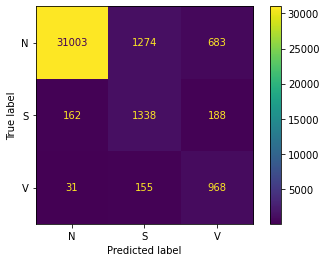

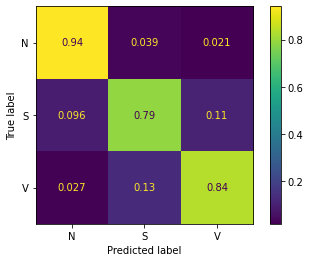

In [ ]:
evaluate_on_valid(vgg, 32, validation_data) # results when both leads are used

              precision    recall  f1-score   support

           N       0.99      0.92      0.96     32960
           S       0.44      0.73      0.55      1688
           V       0.45      0.92      0.60      1154

    accuracy                           0.91     35802
   macro avg       0.63      0.86      0.70     35802
weighted avg       0.95      0.91      0.93     35802



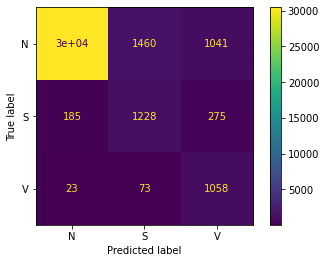

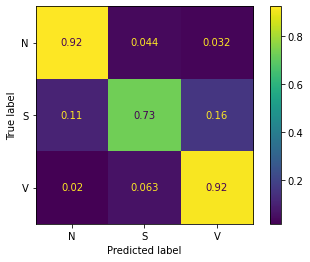

In [ ]:
evaluate_on_valid(vgg, 32, validation_data) # results with just lead 1

In [ ]:
# save the model
vgg.save('/content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/vgg_resampling_2lead(actual best)')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/vgg_resampling_2lead(actual best)/assets


# Evaluation on test set patients

Here we just perform the final evaluation over never experienced patients. We perform the exact same pre-processing procedure

In [ ]:
test=['S038_128.mat', 'S012_128.mat', 'S095_250.mat', 'S052_128.mat',
       'S049_128.mat', 'S084_250.mat', 'S024_128.mat', 'S087_250.mat',
       'S040_128.mat', 'S105_250.mat', 'S037_128.mat']

In [ ]:
# test set with also discarded patients in original split
test=['S038_128.mat', 'S012_128.mat', 
      'S095_250.mat', 'S052_128.mat', 'S049_128.mat', 'S084_250.mat', 
      'S024_128.mat', 'S087_250.mat', 'S040_128.mat', 'S105_250.mat', 
      'S037_128.mat', 'S106_250.mat', 'S091_250.mat', 'S109_250.mat',
      'S085_250.mat']

In [ ]:
# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames_test = list()
ecgs_test = list()
rpks_test = list()
anns_test = list()

for i in range(len(test)):
  ecg, rpk, ann = load_data(input_dir+'/'+test[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, len(test)),
        end=""
    )
  ecgs_test.append(ecg)
  rpks_test.append(rpk)
  anns_test.append(ann)
  filenames_test.append(input_dir+'/'+test[i])

Loading file: 25/25

In [ ]:
# Resample signals to 250Hz
resampled_ecg_1_test = []
resampled_ecg_2_test = []
for i in range(len(ecgs_test)):
   secs_1 = len(ecgs_test[i]['ecg'][:,0])/ecg_freq(filenames_test[i]) # Number of seconds in signal X
   secs_2 = len(ecgs_test[i]['ecg'][:,1])/ecg_freq(filenames_test[i]) # Number of seconds in signal X
   samps_1 = secs_1*250     # Number of samples to downsample
   samps_2 = secs_2*250
   resampled_ecg_1_test.append(scipy.signal.resample(ecgs_test[i]['ecg'][:,0] , int(samps_1))) 
   resampled_ecg_2_test.append(scipy.signal.resample(ecgs_test[i]['ecg'][:,1] , int(samps_2))) 

In [ ]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = scipy.signal.firwin(12, 35/125, fs = 250)

In [ ]:
mf600 = int(250 * 0.6) - 1
mf200 = int(250 * 0.2) - 1
for i in range(len(resampled_ecg_1_test)):
  resampled_ecg_1_test[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_1_test[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_1_test[i], mf200), mf600))
  resampled_ecg_2_test[i] = scipy.signal.lfilter(taps, 1.0, resampled_ecg_2_test[i] - scipy.signal.medfilt(scipy.signal.medfilt(resampled_ecg_2_test[i], mf200), mf600))

In [ ]:
heartbeats_test_1 = []
heartbeats_test_2 = []

for i in range(len(ecgs_test)):
  for j in range(len(rpks_test[i]['rpeaks'])):
   if(from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i])) < win or from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  + win > from_freq_to_freq(rpks_test[i]['rpeaks'][-1],ecg_freq(filenames_test[i]))): #skipping beats that are too much close to the initial and to the end of the signal 
    anns_test[i]['labels'][j] = 'A'
   else: 
    heartbeats_test_1.append(resampled_ecg_1_test[i][from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  - win : from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  + win])
    heartbeats_test_2.append(resampled_ecg_2_test[i][from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  - win : from_freq_to_freq(rpks_test[i]['rpeaks'][j],ecg_freq(filenames_test[i]))  + win])

In [ ]:
labels_test = []

for i in range(len(ecgs_test)):
  for j in range(len(anns_test[i]['labels'])):
    if(anns_test[i]['labels'][j] != 'A'):
     labels_test.append(anns_test[i]['labels'][j])

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

integer_encoded = label_encoder.fit_transform(labels_test)

#One hot encoding of the target values
ohe = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_ohe_test = ohe.fit_transform(integer_encoded)

In [ ]:
y_test = target_ohe_test

In [ ]:
X_test_1 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_test_1, maxlen=win * 2, dtype='float32', truncating='post',padding="post")
X_test_2 = tf.keras.preprocessing.sequence.pad_sequences(heartbeats_test_2, maxlen=win * 2, dtype='float32', truncating='post',padding="post")

In [ ]:
X_test = []
for i in range(len(X_test_1)):
  X_test.append([X_test_1[i], X_test_2[i]])

X_test = np.asarray(X_test)

In [ ]:
#Only lead 1
X_test = np.asarray(X_test_1)

# Normalization for 1 lead only
X_test = (X_test - mean)/std
mean, std

In [ ]:
# Normalization for both 2 leads
X_test[:,0] = (X_test[:,0] - mean[0])/std[0]
X_test[:,1] = (X_test[:,1] - mean[1])/std[1]

X_test = np.swapaxes(X_test, 1, 2)
X_test.shape

(57557, 500, 2)

(25939, 500)

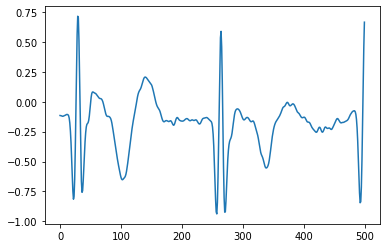

In [ ]:
plt.plot(X_test[900])
X_test.shape

In [ ]:
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix

#utility to plot confusion matrix and evaluation metrics
def evaluate_on_test(model, batch_size, test_to_use):
  #Computing the prediction of the model on the test set
  predictions = []
  for element in test_to_use.batch(batch_size).as_numpy_iterator():
      predictions.append(model.predict(element[0]))
  
  predictions_f = [item for sublist in predictions for item in sublist]

  predictions_oh = []
  #transform prediction into one-hot-encoding 
  for i in range(len(predictions_f)):
      predictions_oh.append(tf.one_hot(tf.argmax(predictions_f[i]), depth=3))
  
  #Compute the true and prediction array in order to plot the confusion matrix
  y = []

  for y_t in y_test.tolist():
      if(y_t == [1, 0, 0]):
          y.append('N')
      if(y_t == [0, 1 ,0]):
          y.append('S')
      if(y_t == [0, 0 ,1]):
          y.append('V')    

  y_pred = []

  for y_t in predictions_oh:
      if(all(tf.equal(y_t, tf.constant([1, 0, 0], dtype=np.float32)))):
          y_pred.append('N')
      elif(all(tf.equal(y_t, tf.constant([0, 1, 0], dtype=np.float32)))):
          y_pred.append('S')
      elif(all(tf.equal(y_t, tf.constant([0, 0, 1], dtype=np.float32)))):
          y_pred.append('V')  
      else:
          print(y_t)

  # Plot confusion matrix and metrics
  ConfusionMatrixDisplay.from_predictions(y, y_pred, labels = ['N', 'S', 'V'])
  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true', labels = ['N', 'S', 'V'])

  print(classification_report(y,y_pred))

In [ ]:
#vgg = tf.keras.models.load_model('/content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/vgg_resampling_2lead(actual best)')

              precision    recall  f1-score   support

           N       0.99      0.95      0.97     23764
           S       0.44      0.83      0.58      1235
           V       0.78      0.76      0.77       940

    accuracy                           0.94     25939
   macro avg       0.74      0.85      0.77     25939
weighted avg       0.96      0.94      0.95     25939



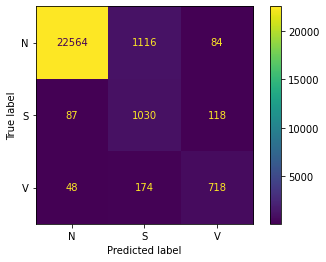

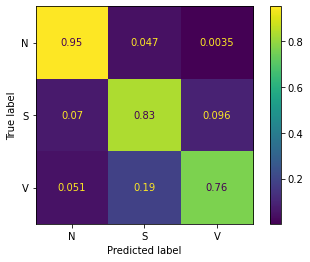

In [ ]:
evaluate_on_test(vgg, 32, test_data) #2 leads

              precision    recall  f1-score   support

           N       0.99      0.93      0.96     23764
           S       0.39      0.91      0.54      1235
           V       0.95      0.68      0.79       940

    accuracy                           0.92     25939
   macro avg       0.78      0.84      0.77     25939
weighted avg       0.96      0.92      0.94     25939



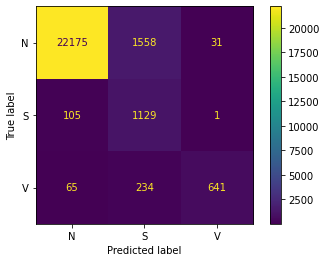

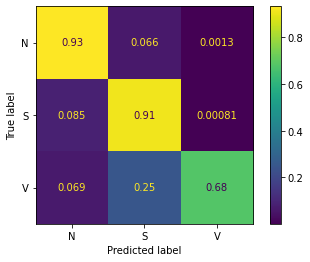

In [ ]:
evaluate_on_test(vgg, 32, test_data) # only lead 1

              precision    recall  f1-score   support

           N       1.00      0.92      0.96     55382
           S       0.19      0.83      0.31      1235
           V       0.71      0.76      0.74       940

    accuracy                           0.92     57557
   macro avg       0.63      0.84      0.67     57557
weighted avg       0.98      0.92      0.94     57557



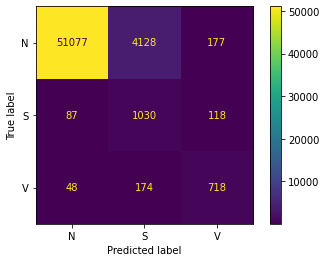

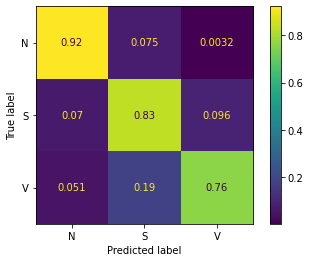

In [ ]:
evaluate_on_test(vgg, 32, test_data) #2 leads but all remaining samples are used (all normal)

# Explainability through CAM (Class Activation Map) and LIME

In this section we want to make results of our deep model more interpretable using Class Activation Map, which give us an indication about which part of the input influence more its final classification. We try to use Grad-CAM, an extension of simple CAM that can be used with all kinds of CNN models

### Grad-CAM

In [ ]:
# Load our pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/vgg_resampling_2lead(actual best)')
#model = vgg
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 500, 32)           224       
                                                                 
 conv1d_14 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 250, 64)           6208      
                                                                 
 conv1d_16 (Conv1D)          (None, 250, 64)           12352     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 125, 64)          0         
 1D)                                                  

In [ ]:
# implementation of Grad-CAM procedure
# utility function that will create the CAM of a single input
def grad_cam(layer, input):
  
  # we extract the output of the last convolutional layer, given an input to the CNN
  grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer).output, model.output])
  last_conv_output, predictions = grad_model(input)

  with tf.GradientTape() as g:
    last_conv_output, predictions = grad_model(input)
    pred_index = tf.argmax(predictions[0])
    class_channel = predictions[:, pred_index]
  
  # compute the gradient of the top predicted class wrt the activations of chosen convolutional layer
  grads = g.gradient(class_channel, last_conv_output)

  pooled_grads = tf.reduce_mean(grads, axis=(0))

  last_conv_output = last_conv_output[0]

  # We finally create the CAM heatmap multiplying the last conv layer output and the gradients computed
  heatmap = last_conv_output * pooled_grads
  heatmap = tf.reduce_mean(heatmap, axis=(1))
  heatmap = np.expand_dims(heatmap, 0)
  return heatmap

Model prediction = S with probability = 0.7980802655220032, True label = S


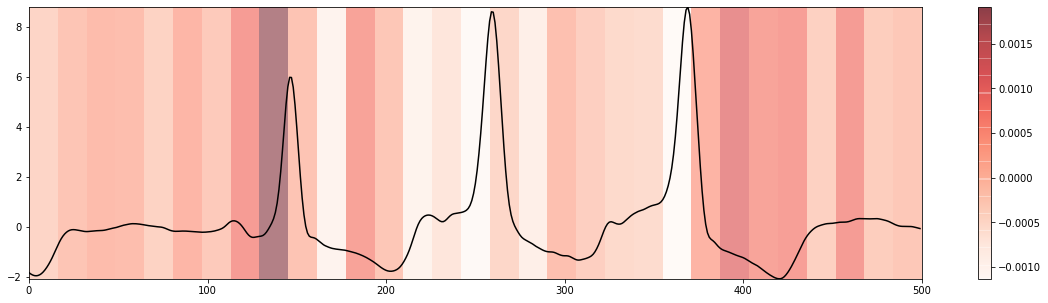

In [ ]:
# try to plot a CAM over the relative heartbeat

# take into consideration the last convolutional layer of the model
layer_considered = "conv1d_12"
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 2000
input = np.expand_dims(X_val[input_index], 0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
heatmap = grad_cam(layer_considered, input)

# plotting heatmap over the beat sample
print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")

plt.figure(figsize=(20, 5))
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(input.reshape(max_len), 'k')
plt.colorbar()
plt.show()

### LIME

We now try an other explainabilty technique called LIME

In [ ]:
# utility class
class model_wrapper:
  def __init__(self, model):
    self.model = model
  
  def predict(self, input_data):
    self.pred = self.model.predict(input_data).ravel()
    return np.array([self.pred]).reshape(input_data.shape[0], 3)

In [ ]:
wrapped_model = model_wrapper(model) 

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=26687211c1afcd30e91e7e128609f0df91ae9b6ce5979ecf8d1038f3d58e979c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# only if lead 1 only
X_train = X_train.reshape(-1, max_len, 1)
X_train.shape

(145732, 500, 1)

In [ ]:
# create a lime object with our data

import lime
from lime import lime_tabular

# we use the Recurrent Tabular Explainer for our CNN model
explainer = lime_tabular.RecurrentTabularExplainer(X_train, training_labels=tf.keras.utils.to_categorical(y_train), feature_names=["beat sample"], discretize_continuous=False, feature_selection='auto', class_names=['N','S','V'])

Model prediction = S with probability = 0.7980802655220032, True label = S


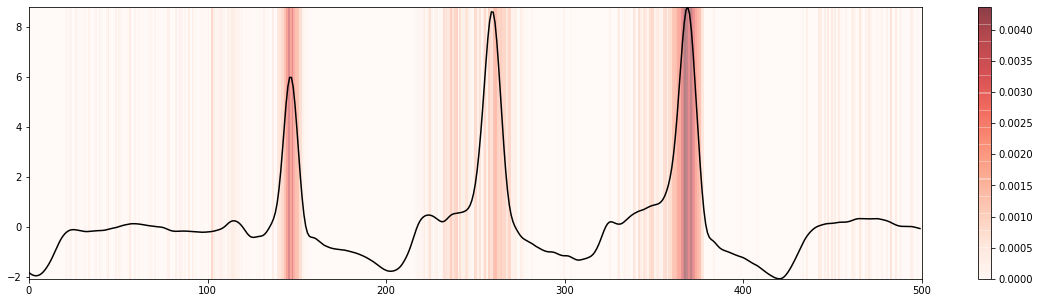

In [ ]:
# try to plot lime heatmap

# take into consideration the last convolutional layer of the model
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 2000
input = np.expand_dims(X_val[input_index], axis=0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
exp = explainer.explain_instance(input, wrapped_model.predict, num_features=max_len, labels=[0, 1, 2])
explanations = exp.as_list(label=label_index)

# creating our heatmap of explanations
heatmap = np.zeros([1,max_len])
for i, k in enumerate(explanations):
  if k[1] > 0:
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] = k[1]

# plotting heatmap over the beat sample
print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")
plt.figure(figsize=(20, 5))
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(input.reshape(max_len), 'k')
plt.colorbar()
plt.show()

### Explainability if 2 leads are used

Model prediction = N with probability = 0.7142273783683777, True label = N


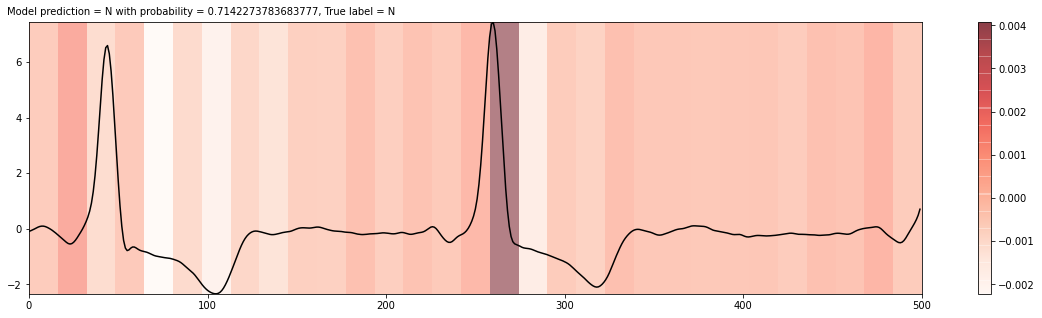

In [ ]:
# try to plot a CAM

# take into consideration the last convolutional layer of the model
layer_considered = "conv1d_25"
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 500
input = np.expand_dims(X_val[input_index], 0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
heatmap = grad_cam(layer_considered, input)

# plotting heatmap over the beat sample
print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")

input = input.reshape(max_len, 2)
lead1 = np.empty(0)
for i in range(max_len):
  lead1 = np.append(lead1, input[i][0])

plt.figure(figsize=(20, 5))
plt.figtext(x=0.11, y=0.9, s= f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(lead1, 'k')
plt.colorbar()
plt.show()

In [ ]:
labels_validation.index('V')

770

In [ ]:
explainer = lime_tabular.RecurrentTabularExplainer(X_train, training_labels=tf.keras.utils.to_categorical(y_train), feature_names=["beat_sample_lead_1", "beat_sample_lead_2"], discretize_continuous=False, feature_selection='auto', class_names=['N','S','V'])

Model prediction = N with probability = 0.7142273783683777, True label = N


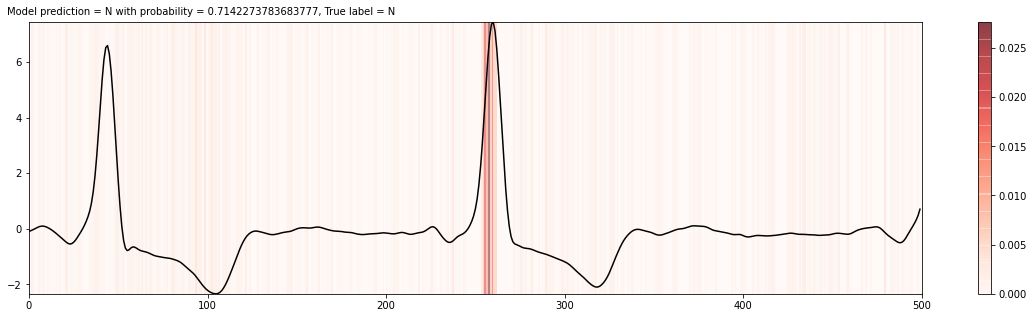

In [ ]:
# try to plot lime heatmap

# take into consideration the last convolutional layer of the model
labels = ['N', 'S', 'V']
max_len = win*2

# beat of validation set to plot
input_index = 500
input = np.expand_dims(X_val[input_index], axis=0)

pred_probs = []
for i in range(3):
  pred_ci = model.predict(input)[0][i]
  pred_probs.append(pred_ci)

# obtain the predicted label of our input
label_index = pred_probs.index(max(pred_probs))
true_label_index = ohe.inverse_transform(y_val[input_index ].reshape(1, -1))[0]

#compute heatmap for our input
exp = explainer.explain_instance(input, wrapped_model.predict, num_features=max_len*2, labels=[0, 1, 2])
explanations = exp.as_list(label=label_index)

#extract explanations of the two different leads
explanations_l1 = []
explanations_l2 = []

for i, e in enumerate(explanations):
  if 'beat_sample_lead_1' in explanations[i][0]:
    explanations_l1.append(e)
  else:
    explanations_l2.append(e)

# creating our heatmap of explanations
heatmap = np.zeros([1,max_len])
for i, k in enumerate(explanations_l1):
  if k[1] > 0:
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] = k[1]

for i, k in enumerate(explanations_l2):
  if k[1] > 0:
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] += k[1]
    heatmap[0, (max_len-1) - int(k[0].split("-")[-1])] /= 2

# plotting heatmap over the beat sample

input = input.reshape(max_len, 2)
lead1 = np.empty(0)
for i in range(max_len):
  lead1 = np.append(lead1, input[i][0])

print(f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")
plt.figure(figsize=(20, 5))
plt.figtext(x=0.11, y=0.9, s= f"Model prediction = {labels[label_index]} with probability = {max(pred_probs)}, True label = {labels[int(true_label_index)]}")
plt.imshow(heatmap, cmap='Reds', aspect="auto", interpolation='nearest', extent=[0, max_len, input.min(), input.max()], alpha=0.5)
plt.plot(lead1, 'k')
plt.colorbar()
plt.show()

As already mentioned, for further clarifications consult the project report